In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

,EEG.F7,EEG.F3,EEG.FC5,EEG.FC6,EEG.F4,EEG.F8
0,4256.410156,4222.179688,4226.153809,4220.641113,4252.563965,4116.153809
1,4250.000000,4222.307617,4223.461426,4218.846191,4254.487305,4111.025879
2,4233.846191,4213.717773,4202.051270,4199.871582,4238.846191,4103.333496
3,4243.205078,4215.128418,4212.563965,4202.436035,4239.102539,4109.871582
4,4262.051270,4222.436035,4243.077148,4217.307617,4259.102539,4122.179688


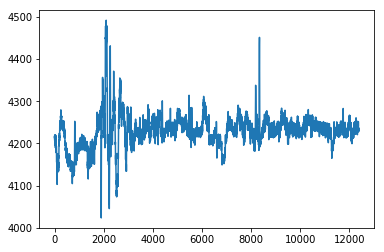

In [5]:
df = pd.read_csv('garbage_data.csv')
plt.plot(df['EEG.AF3'])

frontal_signals = df[['EEG.F7', 'EEG.F3', 'EEG.FC5', 'EEG.FC6', 'EEG.F4', 'EEG.F8']]
frontal_numpy = frontal_signals.values

frontal_signals.head()

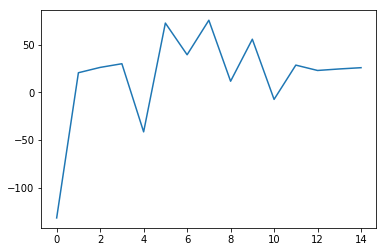

In [13]:
plt.plot(np.fft.fft(frontal_signals['EEG.F7'][0:32])[1:16])

In [33]:
transformed = np.fft.fft(frontal_signals['EEG.F7'][0:32])[1:17]
print(transformed.real)

for i in range(0, len(frontal_signals), 32):
    transformed = np.append(transformed, np.fft.fft(frontal_signals['EEG.F7'][i:i+32])[1:17], axis=0)

[-131.89263382   20.62554218   26.22028813   30.08394522  -41.47851614
   72.7875815    39.51847023   75.769531     11.70842707   55.8363327
   -7.37193528   28.63382478   23.00968207   24.59429562   25.92684173]


In [31]:
transformed.shape

(15,)